# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [47]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [48]:
import hvplot.pandas


In [49]:
import matplotlib.pyplot as plt


In [50]:
# Read the Mapbox API key
load_dotenv()
mapbox = os.getenv("mapbox")
px.set_mapbox_access_token(mapbox)

# Import Data

In [51]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

In [52]:
# view to check data
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [53]:
# view to check data
df_neighborhood_locations.head()


,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [58]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    housing_units_by_year = sfo_data['housing_units'].groupby('year').mean()
    huby_std = housing_units_by_year.std()
    huby_min = housing_units_by_year.min()-huby_std
    huby_max = housing_units_by_year.max()+huby_std
    fig_housing_units = housing_units_by_year.hvplot.bar(title="Housing Units in San Francisco from 2010 to 2016",
                                                        x='year',
                                                        xlabel="Year",
                                                        y='housing_units',
                                                        ylim=(huby_min,huby_max),
                                                        ylabel="Housing Units",
                                                        yformatter='%2f',
                                                        rot=45)

    fhu = pn.panel(fig_housing_units)
    return fhu


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    average_rent_sales = sfo_data.drop(columns=['housing_units']).groupby('year').mean()
    fig_avg_gross_rent = average_rent_sales.hvplot.line(title="Average Gross Rent in San Francisco",
                                                    xlabel="Year",
                                                    y='gross_rent',
                                                    ylabel="Gross Rent")
    average_gross_rent_by_year = pn.panel(fig_avg_gross_rent)
    return average_gross_rent_by_year
    

def average_sales_price():
    """Average Sales Price Per Year."""
    average_rent_sales = sfo_data.drop(columns=['housing_units']).groupby('year').mean()
    fig_avg_sales = average_rent_sales.hvplot.line(title="Average Sale Price per Square Foot in San Francisco",
                                                    xlabel="Year",
                                                    y='sale_price_sqr_foot',
                                                    ylabel="Avg. Sale Price")
    fas = pn.panel(fig_avg_sales)
    return fas
    

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    avg_by_year_neighborhood = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
    abyn_df = pd.DataFrame(data=avg_by_year_neighborhood, columns=('year','neighborhood','sale_price_sqr_foot'))
    abyn_df.rename(columns={'year':'Year',
                       'neighborhood':'Neighborhood'}, inplace=True)
    abyn_fig = abyn_df.hvplot.line(
        y='sale_price_sqr_foot', 
        x='Year', 
        groupby='Neighborhood', 
        ylabel='Sale Price Per Sqft', 
        xlabel='Year',
        widget_location='left_top')
    abyn = pn.panel(abyn_fig)
    return abyn

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    avg_sale_per_neighborhood = sfo_data.groupby(['neighborhood']).mean()
    avg_sale_per_neighborhood.sort_values('sale_price_sqr_foot', ascending=False, inplace=True)
    aspn_df = pd.DataFrame(data=avg_sale_per_neighborhood.iloc[0:10].reset_index())
    aspn_std = aspn_df['sale_price_sqr_foot'].std()
    aspn_min = aspn_df['sale_price_sqr_foot'].min()-aspn_std
    aspn_max = aspn_df['sale_price_sqr_foot'].max()+aspn_std
    top_ten_expensive_fig = aspn_df.hvplot.bar(y='sale_price_sqr_foot',
                                        x='neighborhood',
                                        ylim=(aspn_min,aspn_max),
                                        ylabel='Sale Price Per Sqft',
                                        xlabel='Neighborhood',
                                        rot=45)
    ttef = pn.panel(top_ten_expensive_fig)
    return ttef
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    avg_sale_per_neighborhood = sfo_data.groupby(['neighborhood']).mean()
    avg_sale_per_neighborhood.sort_values('sale_price_sqr_foot', ascending=False, inplace=True)
    aspn_df = pd.DataFrame(data=avg_sale_per_neighborhood.iloc[0:10].reset_index())
    aspn_std = aspn_df['sale_price_sqr_foot'].std()
    aspn_min = aspn_df['sale_price_sqr_foot'].min()-aspn_std
    aspn_max = aspn_df['sale_price_sqr_foot'].max()+aspn_std
    aspn_parallel_coordinates_fig = px.parallel_coordinates(aspn_df, color='sale_price_sqr_foot')
    return aspn_parallel_coordinates_fig

def parallel_categories():
    """Parallel Categories Plot."""
    avg_sale_per_neighborhood = sfo_data.groupby(['neighborhood']).mean()
    avg_sale_per_neighborhood.sort_values('sale_price_sqr_foot', ascending=False, inplace=True)
    aspn_df = pd.DataFrame(data=avg_sale_per_neighborhood.iloc[0:10].reset_index())
    aspn_std = aspn_df['sale_price_sqr_foot'].std()
    aspn_min = aspn_df['sale_price_sqr_foot'].min()-aspn_std
    aspn_max = aspn_df['sale_price_sqr_foot'].max()+aspn_std
    aspn_parallel_categories_fig = px.parallel_categories(aspn_df, color='sale_price_sqr_foot')
    return aspn_parallel_categories_fig

def neighborhood_map():
    """Neighborhood Map"""
    avg_value_per_neighborhood = sfo_data.groupby('neighborhood').mean()
    avpn_df = pd.DataFrame(data=avg_value_per_neighborhood.reset_index()).rename(columns={'neighborhood':'Neighborhood'})
    avg_values_locations = pd.merge(df_neighborhood_locations, avpn_df, on='Neighborhood')
    map = px.scatter_mapbox(avg_values_locations,
                  lat='Lat',
                  lon='Lon',
                  color='gross_rent',
                  zoom=10)
    return pn.pane.Plotly(map)



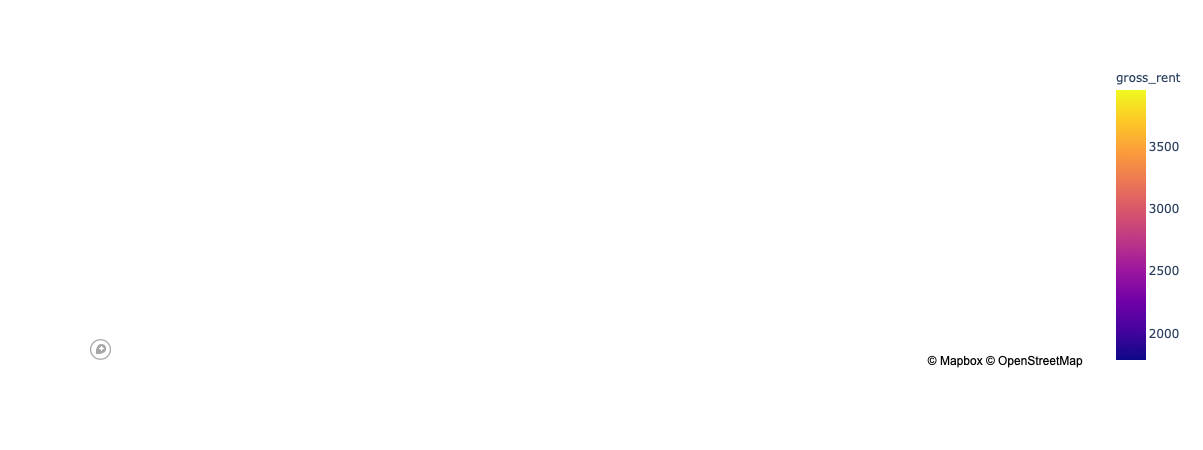

In [55]:
neighborhood_map()

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [66]:
tab_1_columns = pn.Column(housing_units_per_year,average_gross_rent,average_sales_price)

tab_2_columns = pn.Column(
    ("# San Francisco Neighborhood Analysis - 2010 to 2016"),
    ("## Average Prices by Neighborhood"),
    average_price_by_neighborhood,
    ("## Top 10 Most Expensive Neighborhoods"),
    top_most_expensive_neighborhoods()
)

tab_3_columns = pn.Column(
    ("# Parallel Coordinates and Parallel Categories Analysis"),
    ("## Parallel Coordinates Plot"),
    parallel_coordinates(),
    ("## Parallel Categories Plot"),
    parallel_categories()
)

tab_4_columns = pn.Column(
    ("# Averange Sale Price Per Square Foot and Gross Rent in San Francisco"),
    neighborhood_map()
)
    

# Create dashboard Tabs
panel = pn.Tabs(
    ("Rental Analysis", tab_1_columns),
    ("Neighborhood Analysis", tab_2_columns),
    ("Parallel",tab_3_columns),
    ("Geospatial Analysis", tab_4_columns)
)
panel



Tabs
    [0] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars)
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve)
        [2] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] Row
                    [0] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
                    [1] HoloViews(DynamicMap, widget_location='left_top')
        [3] Markdown(str)
        [4] HoloViews(Bars)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
        [3] Markdown(str)
        [4] Plotly(Figure)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure)

## Serve the Panel Dashboard

In [67]:
panel.servable()

Tabs
    [0] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars)
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve)
        [2] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] Row
                    [0] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
                    [1] HoloViews(DynamicMap, widget_location='left_top')
        [3] Markdown(str)
        [4] HoloViews(Bars)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
        [3] Markdown(str)
        [4] Plotly(Figure)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure)